# ADS 2017. Homework 1

### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.02$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.02.

(c) There could be some strong linear relationship between $x$ and $y$.

**(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.**

***'d' is the only correct answer***

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x triples (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

**(a) $y'<3y$ if b is less than one.**

(b) $y'=3y$ in any case.

(c) $y'$ increases by $(2^b-1)*100\%$.

**(d) $y'>3y$ if b is bigger than one.**

***'a' & 'd' are both correct answers***

In [35]:
x = .5
b = .99
y = x**b
y1 = (3*x)**b
print(3*y)
print(y1)

1.5104333250850783
1.4939303368769843


In [174]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn
%matplotlib inline

### Question (3): (30 pt)


In [36]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [37]:
y=[14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
   55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [143]:
data = pd.DataFrame([list(x),list(y)], index=['x','y']).T
std_x = data.x.std()
std_y = data.y.std()
cov_xy = data.cov()['x']['y']
corr_xy = cov_xy / (std_x * std_y)
print('corr(x,y) = {:,.4f}'.format(corr_xy))

corr(x,y) = 0.9563


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [144]:
#update dataframe with stats needed for calculation
data.loc[:,"x_squared"] = data.x * data.x
data.loc[:,"xy"]= data.x * data.y
data.loc[:,"prediction"]= w1 * data.x + w0
data.loc[:,"error"]= data.y - data.prediction

#calculate intercept, slope and r_squared
w1 = (data.xy.sum() - data.y.sum() * data.x.sum() / len(data)) / (data.x_squared.sum() - data.x.sum() * data.x.sum() / len(data))
w0 = (data.y - data.x * w1).mean()
r_squared = 1 - (data.error**2).sum() / ((data.y - data.y.mean())**2).sum()

print("w0 is: {:,.4f} \nw1 is: {:,.4f}\nr_squared is: {:,.3f}".format(w0, w1, r_squared))

w0 is: 1.9571 
w1 is: 5.2887
r_squared is: 0.915


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [147]:
lm = smf.ols(formula='y ~ x', data = data).fit()
print(lm.summary())
print("\nEverything seems to match!")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           4.71e-11
Time:                        12:48:07   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9571      4.236      0.462      0.6

### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [215]:
data_4=pd.read_csv("Housing_Pluto_Session2.csv")

In [216]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
4,11201.0,16307,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [217]:
data_4 = data_4.dropna(axis=0, how='any')
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
4,11201.0,16307,0
5,11201.0,8120,5976000


#### (b). Visualize the data set.

/Users/alexandershannon/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


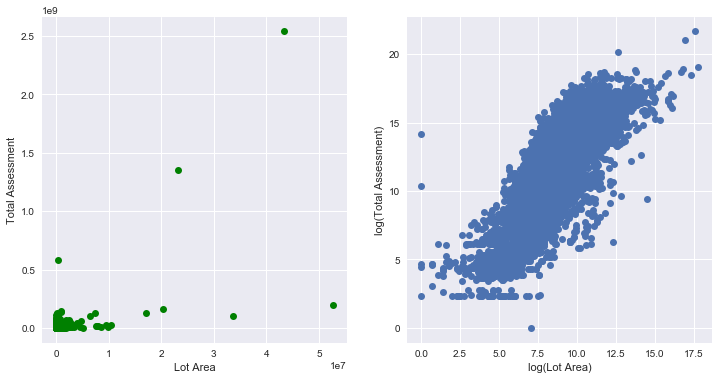

In [218]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = plt.plot(data_4.LotArea, data_4.AssessTot, 'go')
plt.xlabel('Lot Area')
plt.ylabel('Total Assessment')
plt.subplot(1, 2, 2)
ax2 = plt.plot(np.log(data_4.LotArea), np.log(data_4.AssessTot), 'o')
plt.xlabel('log(Lot Area)')
plt.ylabel('log(Total Assessment)')

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 1.719e+05
Date:                Fri, 06 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:40:19   Log-Likelihood:            -4.6370e+06
No. Observations:              276884   AIC:                         9.274e+06
Df Residuals:                  276882   BIC:                         9.274e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.549e+04   8630.783      8.746      0.0

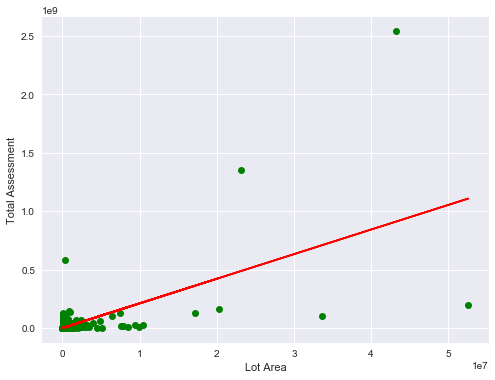

In [219]:
lm = smf.ols(formula='AssessTot ~ LotArea', data = data_4).fit()
print(lm.summary())

plt.figure(figsize=(8, 6))
ax1 = plt.plot(data_4.LotArea, data_4.AssessTot, 'go')
plt.plot(data_4.LotArea,lm.predict(),'r-')
plt.xlabel('Lot Area')
plt.ylabel('Total Assessment')

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 1.722e+05
Date:                Fri, 06 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:40:43   Log-Likelihood:            -4.6371e+06
No. Observations:              276884   AIC:                         9.274e+06
Df Residuals:                  276883   BIC:                         9.274e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LotArea       21.0921      0.051    414.961      0.0

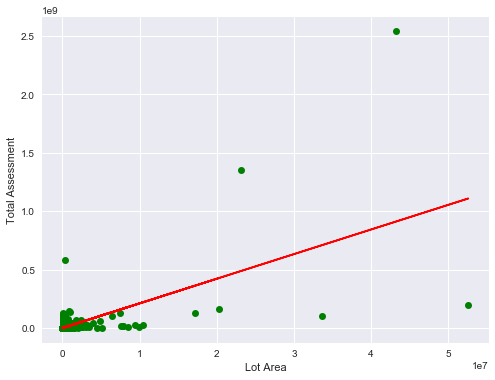

In [222]:
lm2 = smf.ols(formula='AssessTot ~ LotArea-1', data = data_4).fit()
print(lm2.summary())

plt.figure(figsize=(8, 6))
ax1 = plt.plot(data_4.LotArea, data_4.AssessTot, 'go')
plt.plot(data_4.LotArea,lm2.predict(),'r-')
plt.xlabel('Lot Area')
plt.ylabel('Total Assessment')

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

                            OLS Regression Results                            
Dep. Variable:      np.log(AssessTot)   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Fri, 06 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:41:27   Log-Likelihood:            -3.4454e+05
No. Observations:              275942   AIC:                         6.891e+05
Df Residuals:                  275940   BIC:                         6.891e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.2088      0.020     

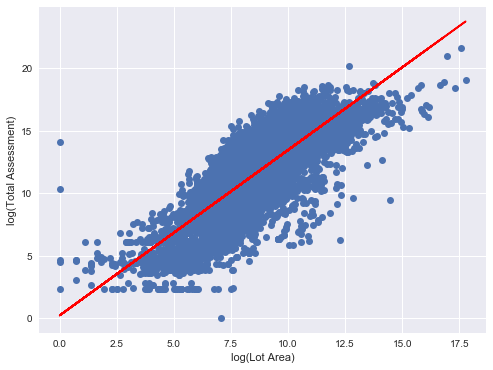

In [223]:
data_5 = data_4[data_4.AssessTot != 0]
data_5 = data_5[data_5.LotArea != 0]

lm3 = smf.ols(formula='np.log(AssessTot) ~ np.log(LotArea)', data = data_5).fit()
print(lm3.summary())

plt.figure(figsize=(8, 6))
ax2 = plt.plot(np.log(data_5.LotArea), np.log(data_5.AssessTot), 'o')
plt.plot(np.log(data_5.LotArea),lm3.predict(),'r-')
plt.xlabel('log(Lot Area)')
plt.ylabel('log(Total Assessment)')

**Interpretation of $w1$: **$w1$ here represents the percent increase in total assessment for every percent increase in lot area. In this case, a 1% increase in lot area corresponds to an approx. 1.32% increase in total assessment, so we could say that there is a super-linear relationship between lot area and total assessment price. 